## Import library

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy import signal

## Reading data

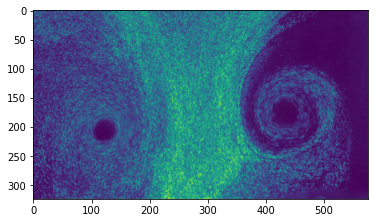

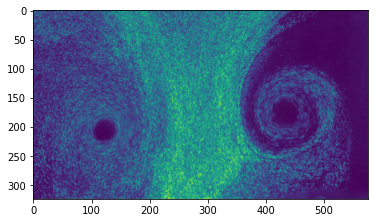

In [9]:
I = cv2.imread('aa1.png')
Height, Width, c = I.shape

Frame1 = np.zeros([Height,Width])
Frame2 = np.zeros([Height,Width])

Frame1[:,:] = I[:,:,1]

I = cv2.imread('aa1.png')
Frame2[:,:] = I[:,:,1]

plt.imshow( Frame1 )
plt.show()
plt.imshow( Frame2 )
plt.show()

## PIV parameters

In [10]:
MaxShift = 20
WindowSize = 10
StrideLength = 10

In [19]:
Height

324

## Main loop

## Cross-correlation:
![gif](Cross_Correlation_Animation.gif) \
Ref: https://en.wikipedia.org/wiki/Cross-correlation

In [36]:
Xmin = (MaxShift+WindowSize)
Xmax = Width-(MaxShift+WindowSize)

Ymin = (MaxShift+WindowSize)
Ymax = Height-(MaxShift+WindowSize)

dX = StrideLength
dY = StrideLength

CrossCorrHeight = int( np.floor( (Ymax-Ymin) / dY ) ) + 1
CrossCorrWidth  = int( np.floor( (Xmax-Xmin) / dX ) ) + 1

CrossCorr = np.zeros( [ CrossCorrHeight , CrossCorrWidth ] )

Vx = np.zeros( [ CrossCorrHeight , CrossCorrWidth ] )
Vy = np.zeros( [ CrossCorrHeight , CrossCorrWidth ] )

for X in range( Xmin , Xmax , dX ):
    for Y in range( Ymin , Ymax , dY ):

        iX = int( np.floor( (X-Xmin) / dX ) )
        iY = int( np.floor( (Y-Ymin) / dY ) )

        WindowXmin = X - WindowSize
        WindowXmax = X + WindowSize

        WindowYmin = Y - WindowSize
        WindowYmax = Y + WindowSize

        WindowFrame1 = Frame1[ WindowYmin : WindowYmax , WindowXmin : WindowXmax ]
        Mean1 = np.sum( np.sum(WindowFrame1) ) / WindowFrame1.size
        WindowFrame1 = WindowFrame1 - Mean1

        for ShiftX in range( -MaxShift , MaxShift ):
            for ShiftY in range( -MaxShift , MaxShift ):

                WindowFrame2 = Frame2[ WindowYmin+ShiftY : WindowYmax+ShiftY , WindowXmin+ShiftX : WindowXmax+ShiftX ]                
                Mean2 = np.sum( np.sum(WindowFrame2) ) / WindowFrame2.size               
                WindowFrame2 = WindowFrame2 - Mean2

                WindowCorr = (WindowFrame1*WindowFrame1) * (WindowFrame2*WindowFrame2)
                CurrentCrossCorr = np.sum( np.sum(WindowCorr) )                

                if CurrentCrossCorr>CrossCorr[iY,iX] :
                    CrossCorr[iY,iX] = CurrentCrossCorr
                    Vx[iY,iX] = ShiftX
                    Vy[iY,iX] = ShiftY

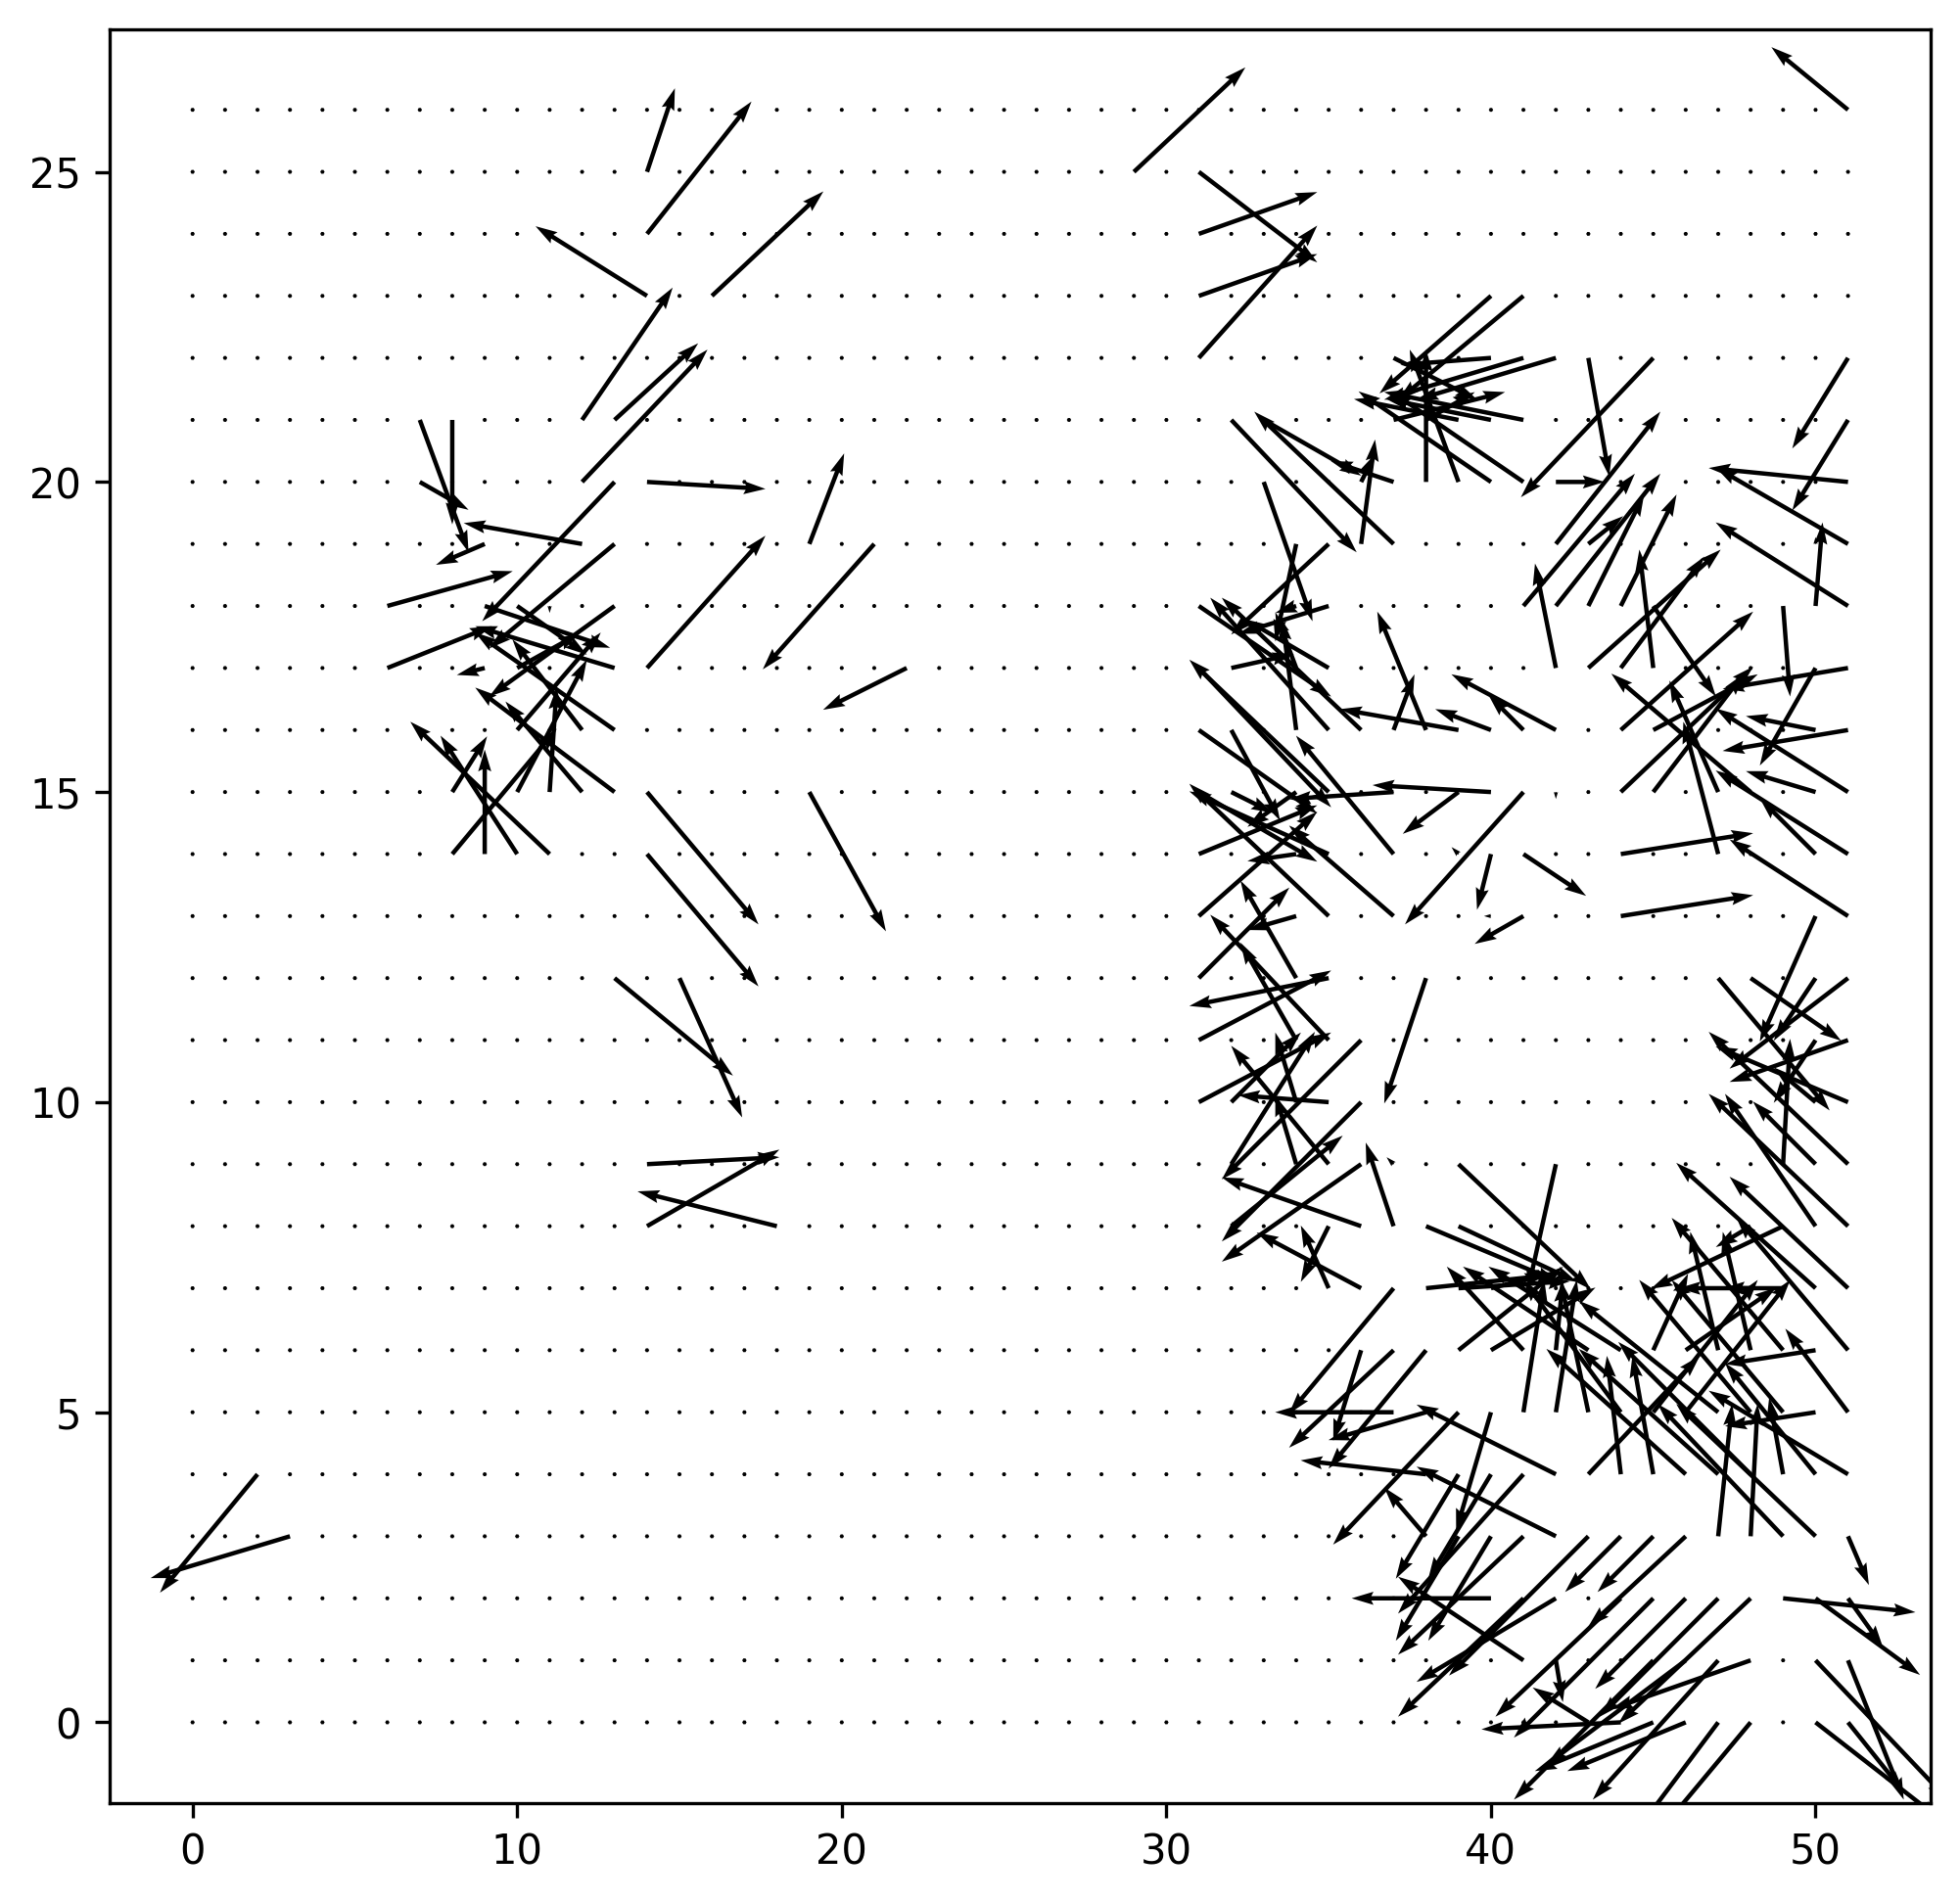

In [37]:
fig, ax = plt.subplots(figsize=(8,8), dpi=300)
q = ax.quiver( Vx , Vy , units='width' )
plt.show()

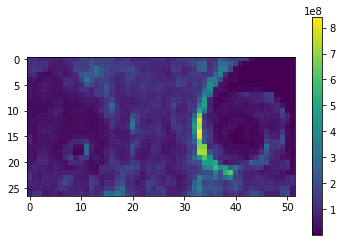

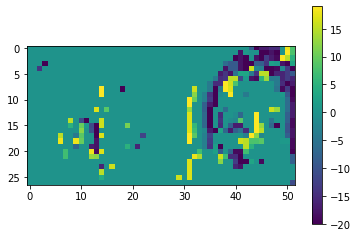

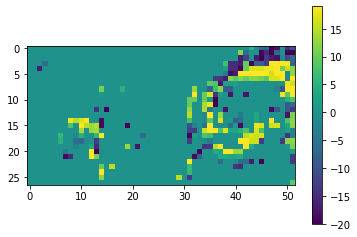

In [40]:
plt.imshow( CrossCorr )
plt.colorbar()
plt.show()

plt.imshow( Vx )
plt.colorbar()
plt.show()

plt.imshow( Vy )
plt.colorbar()
plt.show()

In [32]:
CurrentCrossCorr

85097.08433281252